# ADS - Network analysis module, homework 1

In [ ]:
#add necessary libraries
!pip install pycombo
import pycombo # combo community detection package
import networkx as nx #library supporting networks
from networkx.algorithms import community
import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stat
#make sure plots are embedded into the notebook
%pylab inline 
import statsmodels.formula.api as smf

     |████████████████████████████████| 136 kB 4.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 213 kB 11.3 MB/s 
  Using cached importlib_metadata-1.7.0-py2.py3-none-any.whl (31 kB)
  Created wheel for pycombo: filename=pycombo-0.1.7-cp37-cp37m-manylinux_2_27_x86_64.whl size=98830 sha256=9e19beca46226f3c9742a00b868b377976ed462204d0dc244d4b1c47ed62f386
  Stored in directory: /root/.cache/pip/wheels/58/52/18/4c1b80cd45c091e2c1ea442729343ac984dc66b3a678e2c251
Successfully built pycombo
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.11.3
    Uninstalling importlib-metadata-4.11.3:
      Successfully uninstalled importlib-metadata-4.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdo

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Task 1. Analysis of Les Miserables network 

In [ ]:
#uploading the classical coappearance network of characters in the novel "Les Miserables" to analyze
#first download the data from https://raw.githubusercontent.com/CUSP2021ADS/Data/main/ClassicNet/lesmis.gml
G = nx.read_gml('lesmis.gml') 

### Q1. Visualize the network below with node labes and sizes proportional to node degree

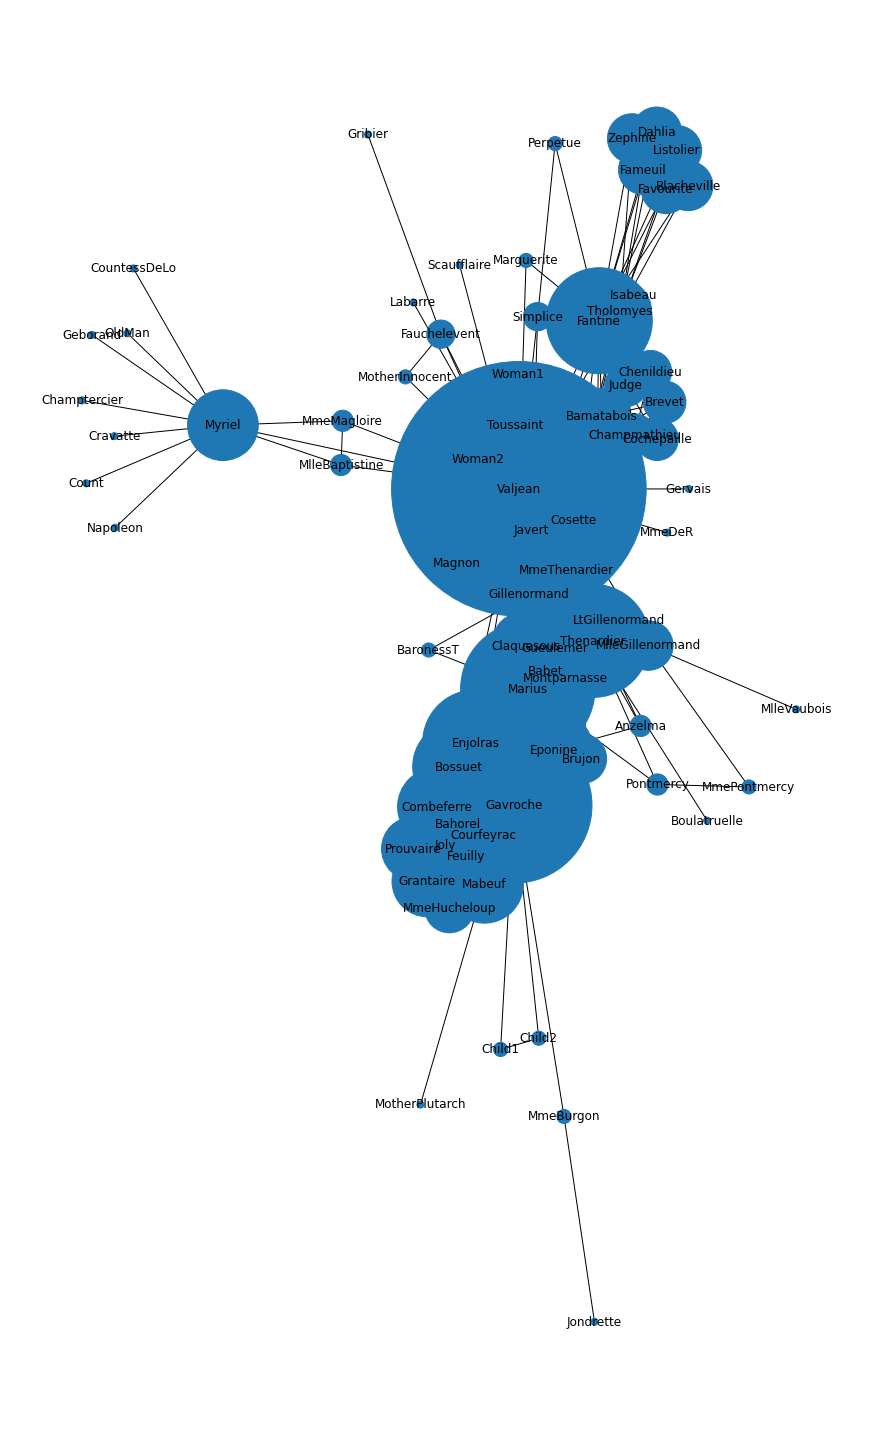

In [ ]:
random.seed(2015)
plt.figure(figsize = (12,20))
nx.draw(G,node_size=50*np.array(list(dict(G.degree()).values()))**2,with_labels=True)


### Q2. Report top nodes by centrality
Print the node labels and corresponding centrality measure for top 5 nodes in terms of

a) degree centrality;

b) betweenness centrality;

c) closeness centrality;

In [ ]:
dc = nx.degree_centrality(G)
Top5dc=sorted(dc.values(),reverse=True)[4]
TopNodesDc = {}
for d in G:
  if dc[d]>=Top5dc:
    TopNodesDc[d] = dc[d]
print(TopNodesDc)

{'Valjean': 0.47368421052631576, 'Thenardier': 0.21052631578947367, 'Javert': 0.22368421052631576, 'Gavroche': 0.2894736842105263, 'Marius': 0.25}


In [ ]:
bc = nx.betweenness_centrality(G)
Top5bc=sorted(bc.values(),reverse=True)[4]
TopNodesBc = {}
for d in G:
  if dc[d]>=Top5bc:
    TopNodesBc[d] = dc[d]
print(TopNodesBc)

{'Myriel': 0.13157894736842105, 'Valjean': 0.47368421052631576, 'Fantine': 0.19736842105263158, 'MmeThenardier': 0.14473684210526316, 'Thenardier': 0.21052631578947367, 'Cosette': 0.14473684210526316, 'Javert': 0.22368421052631576, 'Eponine': 0.14473684210526316, 'Gavroche': 0.2894736842105263, 'Marius': 0.25, 'Mabeuf': 0.14473684210526316, 'Enjolras': 0.19736842105263158, 'Combeferre': 0.14473684210526316, 'Feuilly': 0.14473684210526316, 'Courfeyrac': 0.17105263157894735, 'Bahorel': 0.15789473684210525, 'Bossuet': 0.17105263157894735, 'Joly': 0.15789473684210525, 'Grantaire': 0.13157894736842105, 'Gueulemer': 0.13157894736842105, 'Babet': 0.13157894736842105, 'Claquesous': 0.13157894736842105}


In [ ]:
cc = nx.closeness_centrality(G)
Top5cc=sorted(cc.values(),reverse=True)[4]
TopNodesCc = {}
for d in G:
  if cc[d]>=Top5cc:
    TopNodesCc[d] = cc[d]
print(TopNodesCc)

{'Valjean': 0.6440677966101694, 'Thenardier': 0.5170068027210885, 'Javert': 0.5170068027210885, 'Gavroche': 0.5135135135135135, 'Marius': 0.5314685314685315}


### Q3. Analyze stability of Pagerank centrality
Analyze the impact of parameter $\alpha$ in pagerank centrality for the given network: compare top 5 nodes for different values of $\alpha=0.95, 0.9, 0.85, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1$ and point out an interval for which the ranking remains mostly stable.

In [ ]:
alfa = [0.95,0.9,0.85,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]
for i in alfa:
  pr = nx.pagerank(G, alpha=i)
  Top5pr=sorted(pr.values(),reverse=True)[4]
  TopNodesPr=[d for d in G if pr[d]>=Top5pr]
  print(TopNodesPr)


['Myriel', 'Valjean', 'Javert', 'Gavroche', 'Marius']
['Myriel', 'Valjean', 'Javert', 'Gavroche', 'Marius']
['Myriel', 'Valjean', 'Javert', 'Gavroche', 'Marius']
['Myriel', 'Valjean', 'Javert', 'Gavroche', 'Marius']
['Myriel', 'Valjean', 'Javert', 'Gavroche', 'Marius']
['Myriel', 'Valjean', 'Javert', 'Gavroche', 'Marius']
['Myriel', 'Valjean', 'Javert', 'Gavroche', 'Marius']
['Myriel', 'Valjean', 'Javert', 'Gavroche', 'Marius']
['Myriel', 'Valjean', 'Thenardier', 'Javert', 'Gavroche']
['Myriel', 'Valjean', 'Thenardier', 'Javert', 'Gavroche']
['Myriel', 'Valjean', 'Thenardier', 'Javert', 'Gavroche']


from 0.95 to 0.4 the ranking remains most stable

### Q4. Partition the network using any available algorithm of your choice (e.g. Combo), report network partition modularity score and visualize the partition (different communities with different colors)

In [ ]:
#visualize network partitioning given node locations pos
def visualizePartition(G,partition,pos):
    N=len(G.nodes())
    s=4+4*int(log10(N))
    plt.figure(figsize=(s,s))
    PN=max(partition.values())
    my_cmap = matplotlib.cm.hsv(np.linspace(0,1,PN+1)) #create a colormap for a given number of communities
    c=[]
    for n in G.nodes():
        c.append(1.0*partition[n]/PN)
    nx.draw(G,pos=pos,with_labels=False,arrows=True,node_size=300,node_color=c,width=1,edge_color='black')


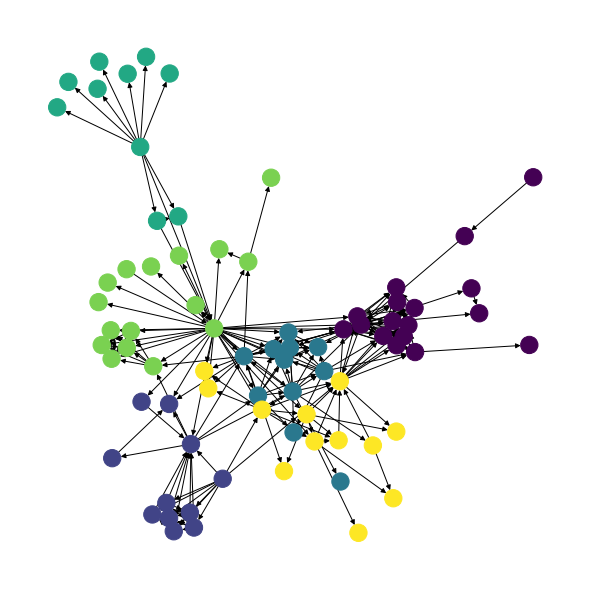

In [ ]:
PC_G, PC_G_mod = pycombo.execute(G, max_communities = 0) #combo partition
visualizePartition(G,PC_G,None)

## Task 2 (World airports). 
### Q1. 
Find connected components, report their number and the sizes.  

### Q2. 
In the largest connected component find and report (print a list of city names and centrality scores) top 10 airports by each centrality metric (degree, betweenneass, closeness, pagerank with $alpha=0.85$). 

### Q3. 
Find maximum and average network distance of the shortest path (number of edges, regardless of size) between all pairs of the airports from the largest connected component. Visualize the shortest path of the maximum length.

### Q4. 
Find average network distance among the top 100 airports by pagerank (with $alpha=0.85$)

### Q5.
Partition the network using Combo algorithm, visualize the partition 


In [ ]:
cities = pd.read_csv('citiesTable.csv', index_col=0 )
cities.head()

,country name,most active airport,long. most active airport,lat. most active airport,number of routes,number incoming flights,number outcoming flights,number incoming domestic flights,number outcoming domestic flights,number incoming international flights,number outcoming international flights,only domestic flights,average distance,max. distance
city name,,,,,,,,,,,,,,
London,United Kingdom,Heathrow,-0.103,51.795,1984,993,992,57,57,936,934,0,3228,11153
Chicago,United States,Chicago Ohare Intl,-87.842,42.631,1406,705,702,526,523,179,178,0,2328,12416
Paris,France,Charles De Gaulle,2.916,49.021,1254,626,629,68,68,558,560,0,3367,11652
Moscow,Russia,Domododevo,38.510,55.681,1179,589,591,231,231,358,359,0,2772,10054
Shanghai,China,Pudong,122.342,31.238,1115,560,556,357,353,203,202,0,2235,12245


In [ ]:
#create a network with city names as nodes
Flights=nx.Graph()
Flights.add_nodes_from(cities.index)

In [ ]:
#now read the links
links = pd.read_csv('citiesToCities.csv' , index_col=None )
links.head()

,departure city,long. departure (decimal),lat. departure (decimal),departure country,arrival city,long. departure (decimal).1,lat. departure (decimal).1,arrival country,number of routes,distance
0,Sao Paulo,-46.116,-23.054,Brazil,Rio De Janeiro,-42.740,-22.682,Brazil,18,348
1,Rio De Janeiro,-42.740,-22.682,Brazil,Sao Paulo,-46.116,-23.054,Brazil,18,348
2,Beijing,116.974,40.133,China,Shanghai,122.342,31.238,China,18,1100
3,Johannesburg,28.410,-25.566,South Africa,Cape Town,19.002,-33.942,South Africa,16,1299
4,Honolulu,-157.871,21.531,United States,Tokyo,140.643,36.274,Japan,16,6103


In [ ]:
#create list of edges as tuples
EN=len(links.index)
edgelist=[(links['departure city'][j],links['arrival city'][j]) for j in range(EN)]

In [ ]:
#add edges to the network
Flights.add_edges_from(edgelist)

In [ ]:
# Q1
nx.number_connected_components(Flights)

4

In [ ]:
CC=sorted(nx.connected_components(Flights), key=len, reverse=True)
for i in range(4):
  print(len(CC[i]))

2981
3
2
2


In [ ]:
select = []
for i in CC[0]:
  select.append(i)
flights = Flights.subgraph(select)

In [ ]:
dc = nx.degree_centrality(flights)
Top10dc=sorted(dc.values(),reverse=True)[9]
TopNodesDc = {}
for d in flights:
  if dc[d]>=Top10dc:
    TopNodesDc[d] = dc[d]
print(TopNodesDc)

{'London': 0.10436241610738255, 'Chicago': 0.06677852348993288, 'Paris': 0.08959731543624161, 'Moscow': 0.07684563758389261, 'Beijing': 0.06174496644295302, 'Frankfurt': 0.07785234899328859, 'Amsterdam': 0.0697986577181208, 'Istanbul': 0.060738255033557044, 'Atlanta': 0.0697986577181208, 'Dallas-fort Worth': 0.060738255033557044}


In [ ]:
bc = nx.betweenness_centrality(flights)
Top10bc=sorted(bc.values(),reverse=True)[9]
TopNodesBc = {}
for d in flights:
  if dc[d]>=Top10bc:
    TopNodesBc[d] = dc[d]
print(TopNodesBc)

{'London': 0.10436241610738255, 'Chicago': 0.06677852348993288, 'Paris': 0.08959731543624161, 'Moscow': 0.07684563758389261, 'Shanghai': 0.053020134228187916, 'Beijing': 0.06174496644295302, 'Denver': 0.054362416107382544, 'Los Angeles': 0.046979865771812075, 'New York': 0.05906040268456376, 'Frankfurt': 0.07785234899328859, 'Houston': 0.05906040268456376, 'Washington': 0.04563758389261745, 'Newark': 0.05167785234899329, 'Amsterdam': 0.0697986577181208, 'Madrid': 0.053691275167785234, 'Seoul': 0.045973154362416106, 'Istanbul': 0.060738255033557044, 'Atlanta': 0.0697986577181208, 'Rome': 0.0587248322147651, 'Barcelona': 0.04563758389261745, 'Munich': 0.053691275167785234, 'Toronto': 0.05201342281879194, 'Dubai': 0.056375838926174496, 'Dallas-fort Worth': 0.060738255033557044, 'Las Vegas': 0.045973154362416106, 'Minneapolis': 0.046308724832214765}


In [ ]:
cc = nx.closeness_centrality(flights)
Top10cc=sorted(cc.values(),reverse=True)[9]
TopNodesCc = {}
for d in flights:
  if cc[d]>=Top10cc:
    TopNodesCc[d] = cc[d]
print(TopNodesCc)

{'London': 0.42335559028271064, 'Chicago': 0.3927253558249868, 'Paris': 0.41637557635880956, 'Los Angeles': 0.39601328903654487, 'New York': 0.40053763440860213, 'Frankfurt': 0.4174838890445503, 'Newark': 0.38964435146443516, 'Amsterdam': 0.4094531464688101, 'Toronto': 0.39632929910892406, 'Dubai': 0.3926218708827404}


In [ ]:
pr = nx.pagerank(flights, alpha=0.85)
Top10pr=sorted(pr.values(),reverse=True)[9]
TopNodesPr = {}
for d in flights:
  if pr[d]>=Top10pr:
    TopNodesPr[d] = pr[d]
print(TopNodesPr)

{'London': 0.006659290961342691, 'Chicago': 0.0047098249542551355, 'Paris': 0.006295939941422259, 'Moscow': 0.006409790102955385, 'Denver': 0.004626422093445785, 'Frankfurt': 0.004802779385676399, 'Houston': 0.0043983802140522875, 'Amsterdam': 0.004312131801712508, 'Atlanta': 0.005016918307551105, 'Dallas-fort Worth': 0.004693215881889283}


In [ ]:
# Q3
allpaths=dict(nx.shortest_path_length(flights))
diameter=0; i0=0; j0=0;
for i in allpaths.items():
  for j in i[1].items():
    if j[1]>diameter:
      diameter=j[1]
      i0=i[0]
      j0=j[0]  
print('{0} - {1} : {2}'.format(i0,j0,diameter))

Peawanuck - Port Williams : 12


In [ ]:
nx.average_shortest_path_length(flights)

3.939842942663716

In [ ]:
def visualize_path(path):
  CityPos={c:(cities['long. most active airport'][c],cities['lat. most active airport'][c])
         for c in cities.index}
  plt.figure(figsize = (12,6))
  nx.draw(Flights,pos=CityPos,with_labels=False,node_size=15,style='dotted',edge_color='green')
  x=[CityPos[v][0] for v in path]
  y=[CityPos[v][1] for v in path]
  plt.plot(x,y,'ro-')
  plt.plot([x[0],x[-1]],[y[0],y[-1]],'bs',markersize=10)

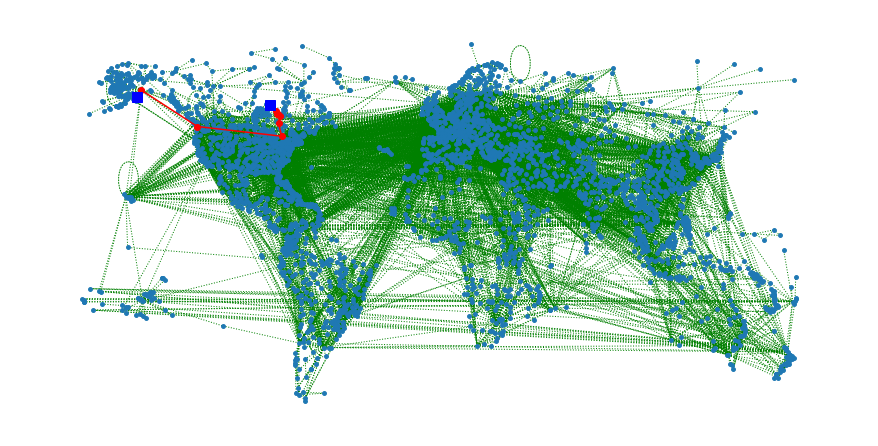

In [ ]:
Lpath=nx.shortest_path(flights,i0,j0)
visualize_path(Lpath)

In [ ]:
# Q4
pr = nx.pagerank(Flights, alpha=0.85)
Top100pr=sorted(pr.values(),reverse=True)[99]
TopNodesPr=[d for d in Flights if pr[d]>=Top100pr]
print(TopNodesPr)
H = Flights.subgraph(TopNodesPr)

['London', 'Chicago', 'Paris', 'Moscow', 'Shanghai', 'Beijing', 'Denver', 'Los Angeles', 'New York', 'Frankfurt', 'Houston', 'Washington', 'Newark', 'Tokyo', 'Amsterdam', 'Madrid', 'Seoul', 'Istanbul', 'Singapore', 'Bangkok', 'Atlanta', 'Rome', 'San Francisco', 'Barcelona', 'Munich', 'Toronto', 'Hong Kong', 'Dubai', 'Guangzhou', 'Dallas-fort Worth', 'Sao Paulo', 'Delhi', 'Brussels', 'Taipei', 'Kuala Lumpur', 'Miami', 'Chengdu', 'Vienna', 'Charlotte', 'Zurich', 'Manchester', 'Mexico City', 'St. Petersburg', 'Duesseldorf', 'Las Vegas', 'Copenhagen', 'Minneapolis', 'Bombay', 'Stockholm', 'Orlando', 'Phoenix', 'Philadelphia', 'Milano', 'Kunming', 'Berlin', 'Detroit', 'Seattle', 'Manila', 'Boston', 'Abu Dhabi', 'Montreal', 'Sydney', 'Fort Lauderdale', 'Osaka', 'Lisbon', 'Rio De Janeiro', 'Vancouver', 'Johannesburg', 'Athens', 'Bogota', 'Helsinki', 'Kiev', 'Doha', 'Jeddah', 'San Jose', 'Buenos Aires', 'Prague', 'Nairobi', 'Cancun', 'Cairo', 'Oslo', 'Dublin', 'Riyadh', 'Birmingham', 'Jakarta'

In [ ]:
nx.average_shortest_path_length(H)

1.7375757575757576

In [ ]:
# Q5
def visualizePartition(G,partition,pos):
    CityPos={c:(cities['long. most active airport'][c],cities['lat. most active airport'][c])
         for c in cities.index}
    N=len(G.nodes())
    s=4+4*int(log10(N))
    plt.figure(figsize=(s,s))
    PN=max(partition.values())
    my_cmap = matplotlib.cm.hsv(np.linspace(0,1,PN+1)) #create a colormap for a given number of communities
    c=[]
    for n in G.nodes():
        c.append(1.0*partition[n]/PN)
    plt.figure(figsize = (12,6))
    nx.draw(G,pos=CityPos,with_labels=False,arrows=True,node_size=300,node_color=c,width=1,edge_color='black')


<Figure size 1152x1152 with 0 Axes>

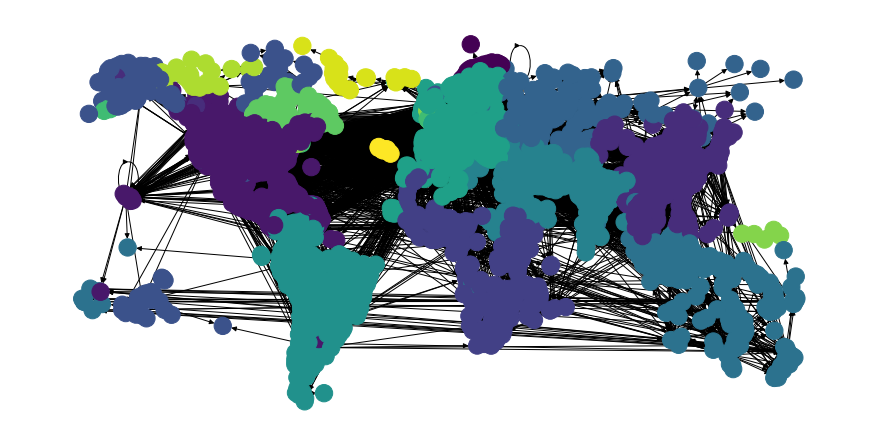

In [ ]:
PC_Flights, PC_Flights_mod = pycombo.execute(Flights, max_communities = 0) #combo partition
visualizePartition(Flights,PC_Flights,None)

# Extracredit task 3. Compare weekend and weekday partitions of the taxi network

download ridership data from:https://drive.google.com/drive/folders/198aY_OAeRWWV4odEyB5_iCUog0p5vYnm?usp=sharing

## Q1. 
Aggregate provided daily taxi ridership into a) all weekend and b) all weekday ridership over the year

## Q2. 
Fit a gravity model $$ridership(o,d)\sim k\cdot pop(o) pop(d) travelime(o,d)^{-q}$$ to both networks, compare exponents (use log-scale linear regression with a slope coefficient $-q$ and intercent $\ln(k)$), replace zero ridership edges with a small number $1e-3$ for logarithm feasibility)

## Q3. 
Partition both networks using Combo algorithm, visualize and compare partitions

In [ ]:
taxi = pd.read_csv('ridership.csv' , index_col=None )
taxi.head()

,Date,PULocationID,DOLocationID,vehicle_count
0,2019-09-01,114,237.0,56.0
1,2019-09-01,74,7.0,97.0
2,2019-09-01,48,230.0,366.0
3,2019-09-01,33,226.0,14.0
4,2019-09-01,198,256.0,119.0


In [ ]:
taxi = taxi[taxi['Date'] != '2019-04-']
taxi['Date'] = pd.to_datetime(taxi['Date'])
taxi['DOW'] = taxi['Date'].dt.dayofweek
taxi.head()

,Date,PULocationID,DOLocationID,vehicle_count,DOW
0,2019-09-01,114,237.0,56.0,6
1,2019-09-01,74,7.0,97.0,6
2,2019-09-01,48,230.0,366.0,6
3,2019-09-01,33,226.0,14.0,6
4,2019-09-01,198,256.0,119.0,6


In [ ]:
#Q1
taxi_weekend = taxi[taxi['DOW'] >= 5]
taxi_weekday = taxi[taxi['DOW'] < 5]

In [ ]:
taxi_weekend.head()

,Date,PULocationID,DOLocationID,vehicle_count,DOW
0,2019-09-01,114,237.0,56.0,6
1,2019-09-01,74,7.0,97.0,6
2,2019-09-01,48,230.0,366.0,6
3,2019-09-01,33,226.0,14.0,6
4,2019-09-01,198,256.0,119.0,6


In [ ]:
taxi_weekday.head()

,Date,PULocationID,DOLocationID,vehicle_count,DOW
48,2019-09-02,56,223.0,13.0,0
49,2019-09-02,145,48.0,49.0,0
50,2019-09-02,50,48.0,214.0,0
51,2019-09-02,223,254.0,3.0,0
52,2019-09-02,184,225.0,1.0,0


In [ ]:
# Q2
taxi_pop = pd.read_csv('taxi_zone_pop.csv' , index_col=None )
taxi_pop.head()

,location_id,Population
0,2,1785
1,8,1785
2,93,1785
3,96,1785
4,207,1785


In [ ]:
travelTim = pd.read_csv('taxiZones_tripduration.csv', index_col=None)
#travelTim = travelTim[travelTim.duration < 200]
#travelTim.loc[(travelTim.PULocationID == travelTim.DOLocationID), 'time_minutes'] = 10  ## assign travel time b/w same zones as 10min
travelTim.head()

,PULocationID,DOLocationID,duration
0,1,1,457.029586
1,1,24,2772.000000
2,1,40,2665.000000
3,1,45,2013.000000
4,1,48,4525.000000


In [ ]:
allData_weekday = taxi_weekday.merge(taxi_pop, left_on='PULocationID', right_on='location_id')
allData_weekday = allData_weekday.merge(taxi_pop, left_on='DOLocationID', right_on='location_id')
allData_weekday = allData_weekday.merge(travelTim, left_on=['PULocationID', 'DOLocationID'], right_on=['PULocationID', 'DOLocationID'])
allData_weekday.rename(columns={'Population_x':'O_population', 'Population_y':'D_population'}, inplace=True)
allData_weekday = allData_weekday[['PULocationID', 'DOLocationID', 'vehicle_count', 'O_population', 'D_population','duration']]
allData_weekday.head()

,PULocationID,DOLocationID,vehicle_count,O_population,D_population,duration
0,145,223.0,95.0,61947,53604,1285.198347
1,145,223.0,53.0,61947,53604,1285.198347
2,145,223.0,77.0,61947,53604,1285.198347
3,145,223.0,69.0,61947,53604,1285.198347
4,145,223.0,78.0,61947,53604,1285.198347


In [ ]:
allData_weekend = taxi_weekend.merge(taxi_pop, left_on='PULocationID', right_on='location_id')
allData_weekend = allData_weekend.merge(taxi_pop, left_on='DOLocationID', right_on='location_id')
allData_weekend = allData_weekend.merge(travelTim, left_on=['PULocationID', 'DOLocationID'], right_on=['PULocationID', 'DOLocationID'])
allData_weekend.rename(columns={'Population_x':'O_population', 'Population_y':'D_population'}, inplace=True)
allData_weekend = allData_weekend[['PULocationID', 'DOLocationID', 'vehicle_count', 'O_population', 'D_population','duration']]
allData_weekend.head()

,PULocationID,DOLocationID,vehicle_count,O_population,D_population,duration
0,114,237.0,56.0,68483,63664,1361.4175
1,114,237.0,123.0,68483,63664,1361.4175
2,114,237.0,68.0,68483,63664,1361.4175
3,114,237.0,99.0,68483,63664,1361.4175
4,114,237.0,65.0,68483,63664,1361.4175


In [ ]:
import statsmodels.api as sm
def gravity(T_i, T_j, C_ij, mob_gt):
    
    X = sm.add_constant(np.log(C_ij))
    y = np.log(mob_gt) - np.log(T_i) - np.log(T_j)
    
    model = sm.OLS(y, X).fit()
    
    return model

In [ ]:
model_pop_jobs = gravity(allData_weekday.O_population, allData_weekday.D_population, allData_weekday.duration, allData_weekday.vehicle_count)
model_pop_jobs.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1594: RuntimeWarning: invalid value encountered in subtract
  return np.sum(weights * (model.endog - mean)**2)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 21 Apr 2022   Prob (F-statistic):                nan
Time:                        22:57:54   Log-Likelihood:                    nan
No. Observations:              815577   AIC:                               nan
Df Residuals:                  815575   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        nan         nan         nan
duration          nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                         87.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x = allData_weekend[['PULocationID', 'DOLocationID', 'vehicle_count']]
G = nx.from_pandas_edgelist(x, 'PULocationID', 'DOLocationID', 'vehicle_count')

In [ ]:
def visualizePartition(G,partition,pos):
    N=len(G.nodes())
    s=4+4*int(log10(N))
    plt.figure(figsize=(s,s))
    PN=max(partition.values())
    my_cmap = matplotlib.cm.hsv(np.linspace(0,1,PN+1)) #create a colormap for a given number of communities
    c=[]
    for n in G.nodes():
        c.append(1.0*partition[n]/PN)
    nx.draw(G,pos=pos,with_labels=False,arrows=True,node_size=300,node_color=c,width=1,edge_color='black')


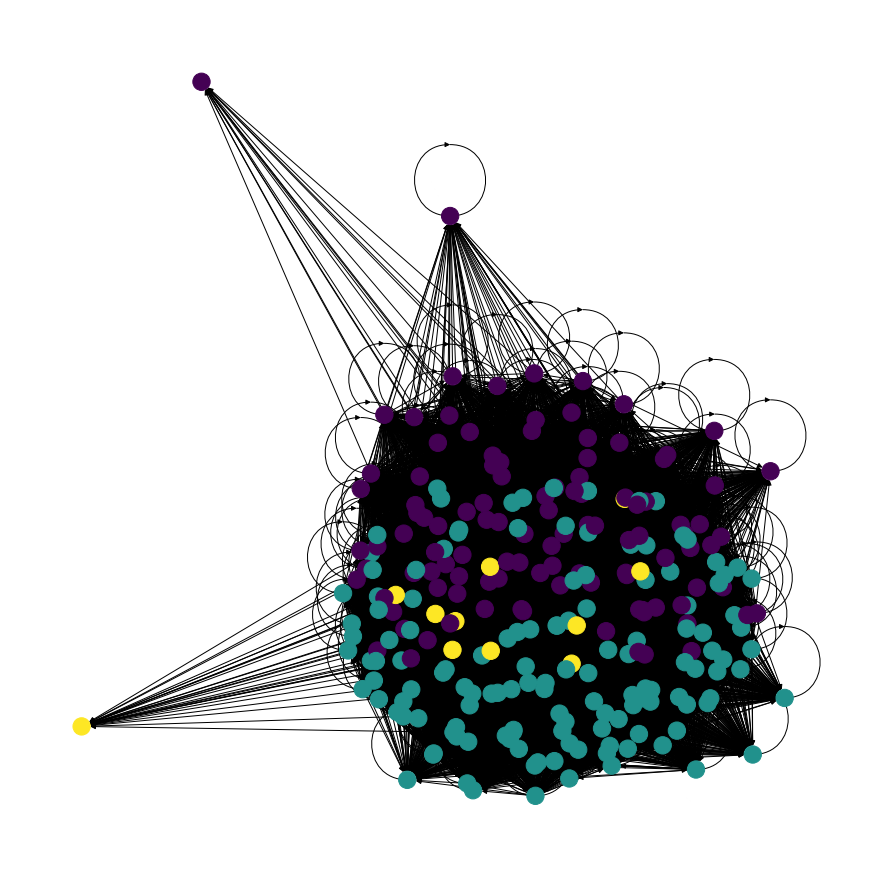

In [ ]:
PC_G, PC_G_mod = pycombo.execute(G, max_communities = 0) #combo partition
visualizePartition(G,PC_G,None)

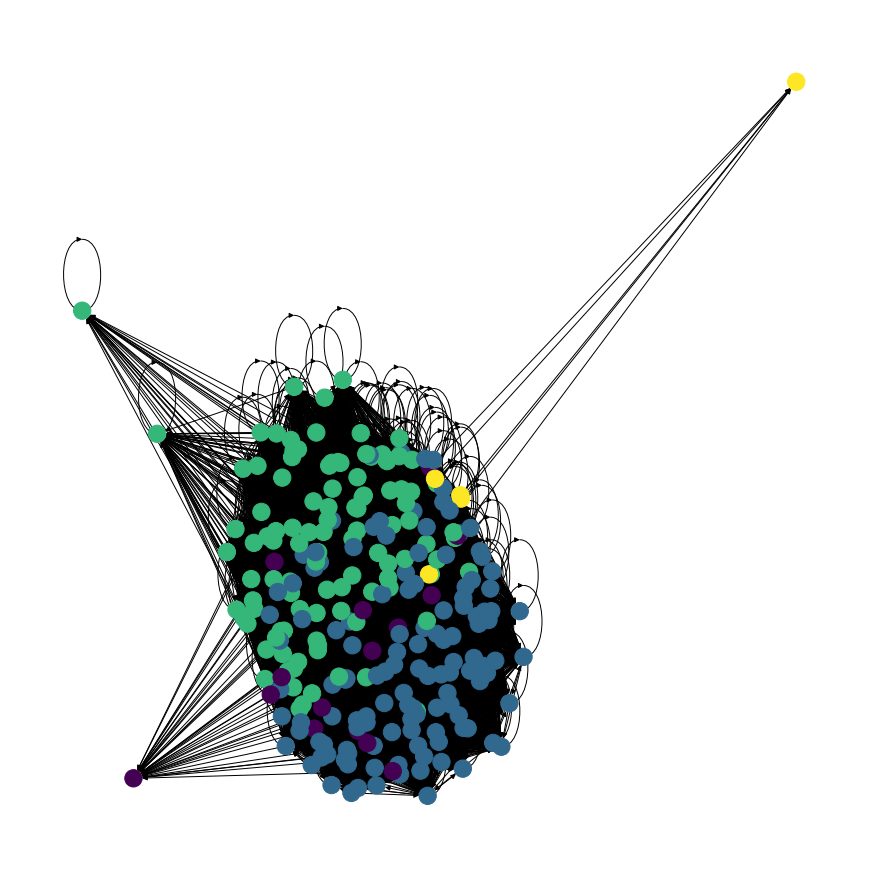

In [ ]:
x = allData_weekday[['PULocationID', 'DOLocationID', 'vehicle_count']]
G = nx.from_pandas_edgelist(x, 'PULocationID', 'DOLocationID', 'vehicle_count')
PC_G, PC_G_mod = pycombo.execute(G, max_communities = 0) #combo partition
visualizePartition(G,PC_G,None)